import kaggle party member

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

For each id in the test set, you must predict the value for the target MedHouseVal.

In [70]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [72]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24759 entries, 0 to 24758
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          24759 non-null  int64  
 1   MedInc      24759 non-null  float64
 2   HouseAge    24759 non-null  float64
 3   AveRooms    24759 non-null  float64
 4   AveBedrms   24759 non-null  float64
 5   Population  24759 non-null  float64
 6   AveOccup    24759 non-null  float64
 7   Latitude    24759 non-null  float64
 8   Longitude   24759 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.7 MB


In [73]:
df_train.duplicated().any()

False

id


<Figure size 216x216 with 0 Axes>

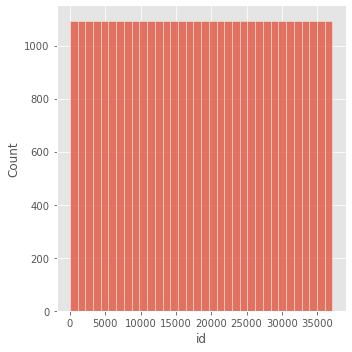

MedInc


<Figure size 216x216 with 0 Axes>

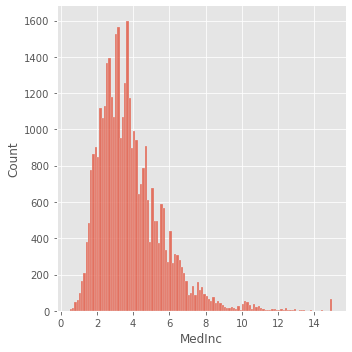

HouseAge


<Figure size 216x216 with 0 Axes>

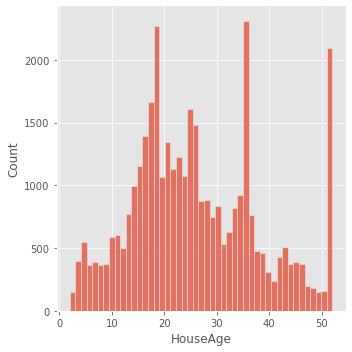

AveRooms


<Figure size 216x216 with 0 Axes>

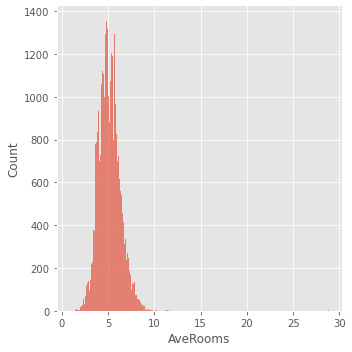

AveBedrms


<Figure size 216x216 with 0 Axes>

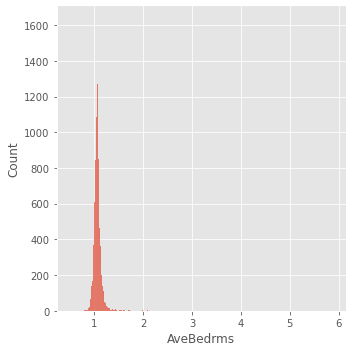

Population


<Figure size 216x216 with 0 Axes>

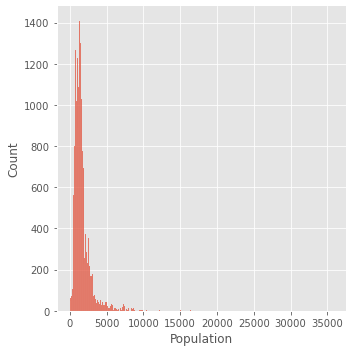

AveOccup


<Figure size 216x216 with 0 Axes>

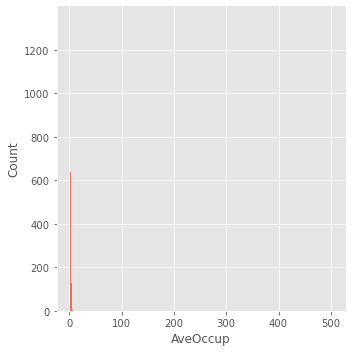

Latitude


<Figure size 216x216 with 0 Axes>

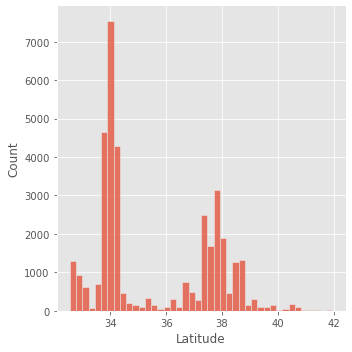

Longitude


<Figure size 216x216 with 0 Axes>

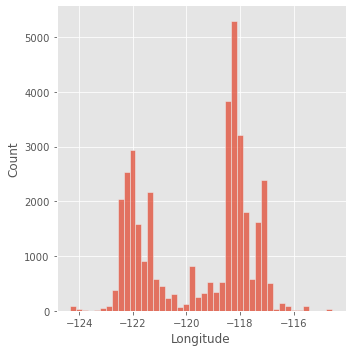

MedHouseVal


<Figure size 216x216 with 0 Axes>

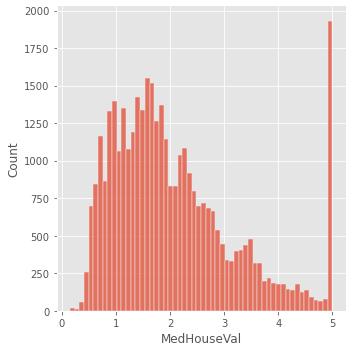

In [74]:
for column in df_train:
    print(column)
    plt.figure(figsize = (3, 3))
    plt.style.use('ggplot')
    sns.displot(df_train[column])
    plt.show()

In [75]:
df_train.skew()

id               0.000000
MedInc           1.567604
HouseAge         0.413457
AveRooms         1.301106
AveBedrms       12.965449
Population       5.796582
AveOccup       170.890130
Latitude         0.439251
Longitude       -0.313242
MedHouseVal      0.970856
dtype: float64

Handling Skewness

In [76]:
for column in df_train.iloc[:,1:]:
    quantile1=df_train[column].quantile(0.25)
    quantile2=df_train[column].quantile(0.75)
    df_train[column]=np.where(df_train[column]<quantile1,quantile1,df_train[column])
    df_train[column]=np.where(df_train[column]>quantile2,quantile2,df_train[column])
    s = round(df_train[column].skew(),6)
    print(s)

0.14029
0.170154
0.030626
-0.001763
0.047429
0.028359
0.336575
-0.385774
0.152347


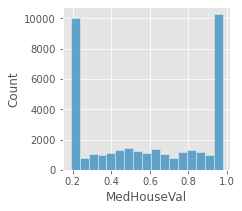

In [77]:
fig,ax = plt.subplots(figsize=(3,3))
sns.histplot(np.log(df_train['MedHouseVal']))
plt.show()

In [78]:
correlation = df_train.corr()

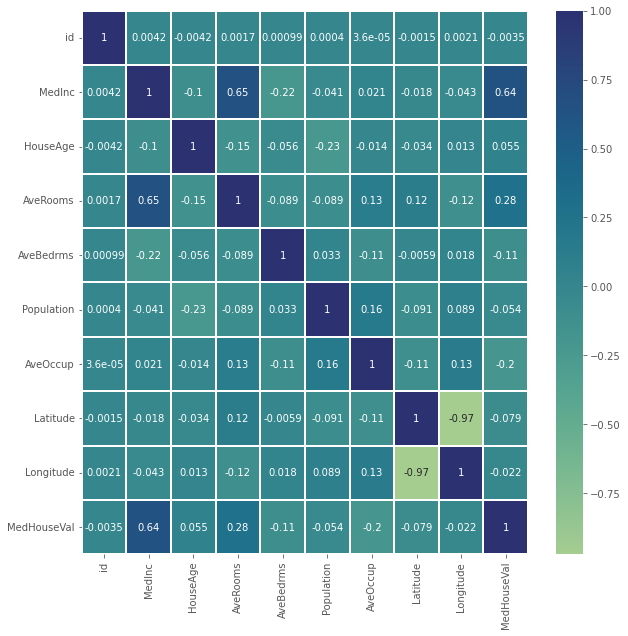

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

In [80]:
for column in df_test.iloc[:,1:]:
    quantile1=df_test[column].quantile(0.25)
    quantile2=df_test[column].quantile(0.75)
    df_test[column]=np.where(df_test[column]<quantile1,quantile1,df_test[column])
    df_test[column]=np.where(df_test[column]>quantile2,quantile2,df_test[column])
    s = round(df_test[column].skew(),6)
    print(s)

0.148216
0.168897
0.018701
0.001988
0.04709
0.023744
0.315398
-0.364018


In [81]:
df_test.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,2.59015,35.0,4.966368,1.088295,1318.0,2.844411,37.72,-121.80
1,37138,2.59015,22.0,4.356443,1.088295,1874.0,3.129167,33.95,-118.29
2,37139,4.68750,21.0,5.858646,1.020460,1535.0,2.888889,33.93,-118.02
3,37140,4.68060,35.0,4.769697,1.048485,955.0,2.400000,34.17,-118.34
4,37141,3.12840,25.0,4.356443,1.081633,1874.0,2.400000,34.17,-118.29


In [82]:
X_train = df_train.iloc[:,1:9]
y_train = df_train.MedHouseVal

In [83]:
X_test = df_test.iloc[:,1:]

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
reg1 = GradientBoostingRegressor(random_state=1)

from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor(random_state=1)

from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()

from sklearn.ensemble import VotingRegressor
regressor = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lir', reg3)])

regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
prediction

array([1.37152343, 1.46299946, 2.02651712, ..., 1.3575014 , 2.15875361,
       2.2759891 ])

In [85]:
submission = pd.DataFrame({'id': df_test.id, 'MedHouseVal': prediction})
submission.head()

,id,MedHouseVal
0,37137,1.371523
1,37138,1.462999
2,37139,2.026517
3,37140,2.551099
4,37141,2.106998


In [86]:
submission.to_csv('submission.csv', index=False)